Contours

In [1]:
# for better accuracy, use binary images. Apply threshold
# to find the contours from the image, the object to be found should be white and the background should be black.
# by finding the area inside the contours we can sort to get the biggest ones or smaller ones. is given by cv2.contourArea() it receives only one parameter: the contour

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def imshow(raw_pic):
    modified = cv2.cvtColor(raw_pic,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,14))
    return plt.imshow(modified)

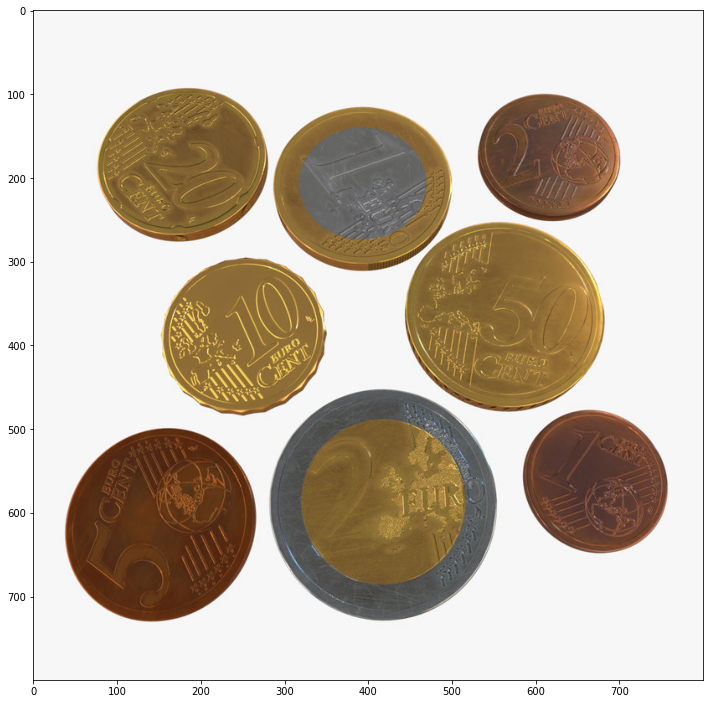

In [4]:
coins = cv2.imread('img/coins5.jpg')
grayscale_coins = cv2.cvtColor(coins,cv2.COLOR_BGR2GRAY)

imshow(coins)

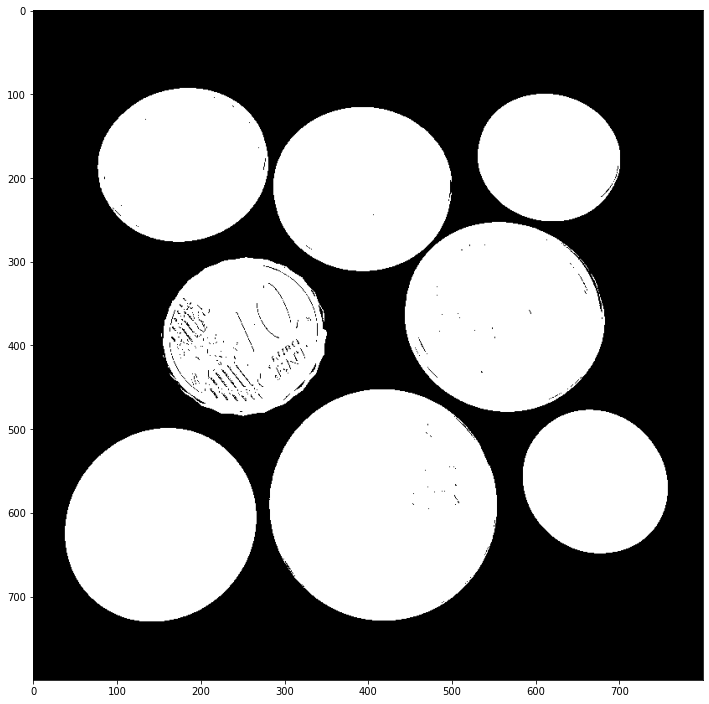

In [5]:
retval, threshold = cv2.threshold(grayscale_coins,200,255,cv2.THRESH_BINARY_INV)
imshow(threshold)

In [6]:
contours, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [7]:
len(contours)

19

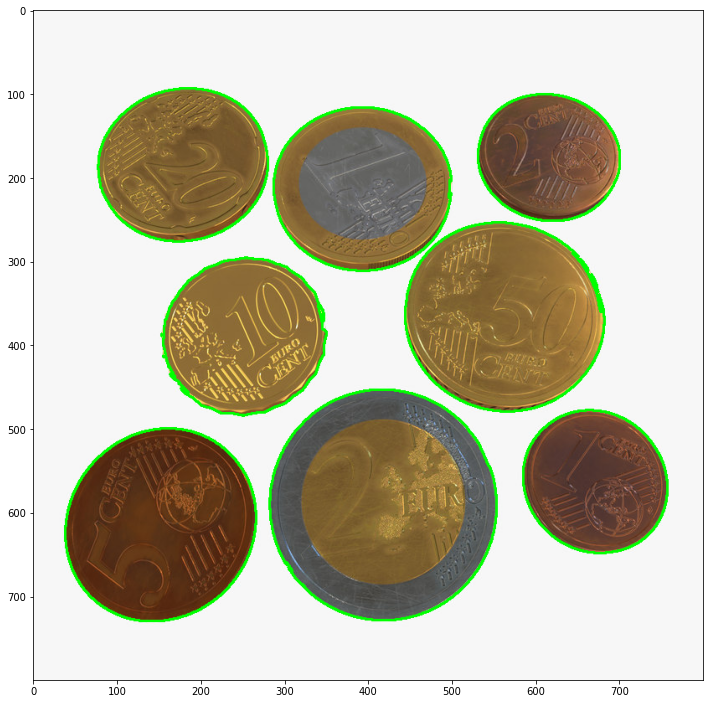

In [8]:
copy = coins.copy()

cv2.drawContours(copy,contours,-1,(0,255,0),2)
imshow(copy)

In [9]:
sorted_contours = sorted(contours,key=cv2.contourArea, reverse=True)

In [21]:
sorted_contours

[array([[[402, 453]],
 
        [[401, 454]],
 
        [[400, 454]],
 
        ...,
 
        [[405, 453]],
 
        [[404, 453]],
 
        [[403, 453]]], dtype=int32),
 array([[[548, 253]],
 
        [[547, 254]],
 
        [[546, 254]],
 
        ...,
 
        [[551, 253]],
 
        [[550, 253]],
 
        [[549, 253]]], dtype=int32),
 array([[[152, 499]],
 
        [[151, 500]],
 
        [[150, 500]],
 
        ...,
 
        [[155, 499]],
 
        [[154, 499]],
 
        [[153, 499]]], dtype=int32),
 array([[[380, 116]],
 
        [[379, 117]],
 
        [[378, 117]],
 
        ...,
 
        [[383, 116]],
 
        [[382, 116]],
 
        [[381, 116]]], dtype=int32),
 array([[[175,  93]],
 
        [[174,  94]],
 
        [[173,  94]],
 
        ...,
 
        [[178,  93]],
 
        [[177,  93]],
 
        [[176,  93]]], dtype=int32),
 array([[[253, 295]],
 
        [[252, 296]],
 
        [[251, 296]],
 
        ...,
 
        [[256, 296]],
 
        [[255, 295]],
 
     

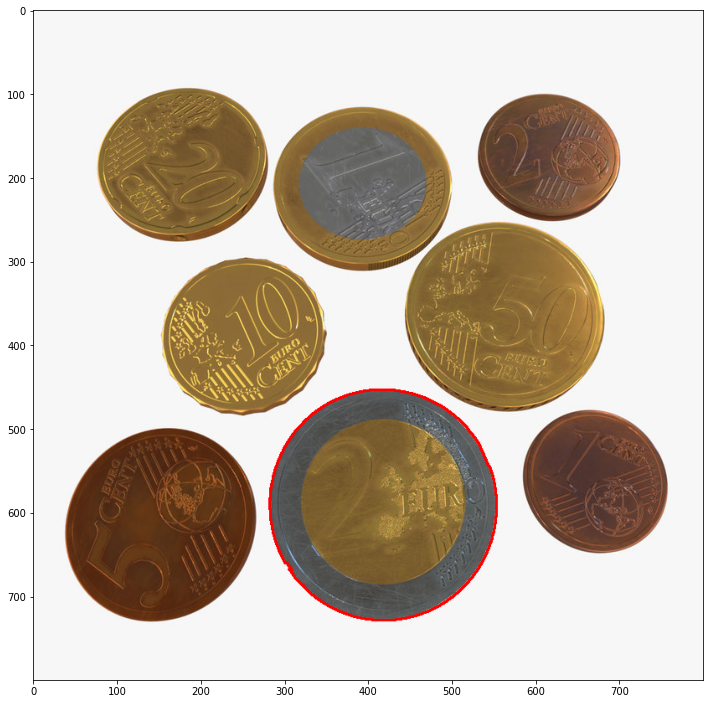

In [25]:
copy = coins.copy()

cv2.drawContours(copy,sorted_contours[0:1],-1,(0,0,255),2)
imshow(copy)

In [11]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [12]:
left_to_right_contours, bb = sort_contours(sorted_contours[0:8])

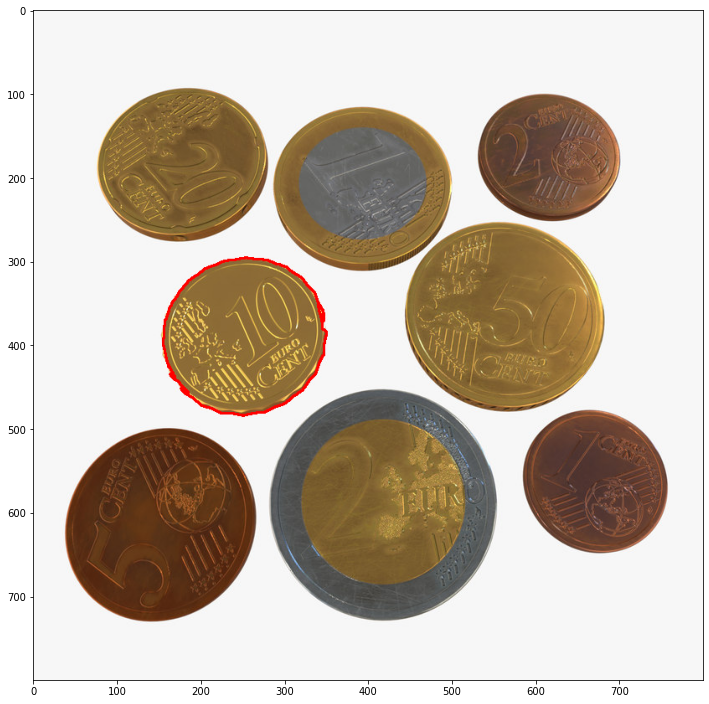

In [13]:
copy = coins.copy()

cv2.drawContours(copy,left_to_right_contours,2,(0,0,255),2)
imshow(copy)